## Praca domowa 4

#### Autor: Kinga Frańczak

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

### 2a

In [32]:
tmp = df.loc[df.Year > 2015].loc[df.NA_Sales < df.EU_Sales].loc[df.Publisher == 'Nintendo'].reset_index().drop('Rank', axis = 1).drop('index', axis = 1)
tmp

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
1,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
2,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


### 2b

In [27]:
tmp = df.loc[df.Year == 2010].groupby(['Genre', 'Year']).agg('sum').reset_index().drop('Rank', axis = 1)
tmp.loc[tmp.Global_Sales == tmp.Global_Sales.max()]

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,2010.0,60.32,35.75,8.58,12.85,117.64


### 2c

In [41]:
tmp = df.groupby('Genre').agg('mean').drop('Rank', axis = 1).reset_index()
tmp = tmp.loc[tmp.JP_Sales > tmp.EU_Sales]
tmp = tmp[['Genre', 'JP_Sales']]
tmp = tmp.rename(columns = { 'Genre': 'Typ Gry',
                            'JP_Sales': 'Średnia sprzedaż w Japonii'})
tmp

,Typ Gry,Średnia sprzedaż w Japonii
5,Puzzle,0.099439
7,Role-Playing,0.238293
11,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Poprawiane wykresy


In [162]:
troj = pd.read_csv('trojmiasto.csv')

In [92]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Analiza danych

In [163]:
troj['data'] = troj['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
troj = troj.assign(tydzien = troj.data.apply(lambda x: x.strftime('%W')))
daty = troj[["data", "tydzien"]].groupby('tydzien').agg('min').reset_index()
troj = troj.groupby('tydzien').agg('sum').merge(daty, on = 'tydzien')
troj = troj.assign(tydzien = troj.data.apply(lambda x: x.strftime('%d-%m')))
troj.trojmiasto = troj.trojmiasto/1000
troj.pomorskie = troj.pomorskie/1000
troj = troj[['tydzien', 'pomorskie', 'trojmiasto']]
troj = troj.set_index('tydzien')

### Wykres

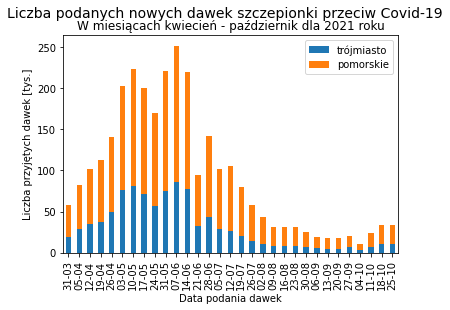

In [203]:
troj[['trojmiasto', 'pomorskie']].plot(kind='bar', stacked=True)
plt.ylabel('Liczba przyjętych dawek [tys.]')
plt.xlabel('Data podania dawek')
plt.suptitle('Liczba podanych nowych dawek szczepionki przeciw Covid-19', fontsize=14)
plt.title('W miesiącach kwiecień - październik dla 2021 roku')
plt.legend().get_texts()[0].set_text("trójmiasto")